In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('../../Day1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [11]:
crosstab_prop = pd.crosstab(
    df['category'],
    df['isBestSeller'],
    normalize='index'   
)
crosstab_prop

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [12]:
crosstab_prop_sorted = (
    crosstab_prop
    .sort_values(by=True, ascending=False)
)

crosstab_prop_sorted.head(10)

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


In [15]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(np.float64(36540.20270061387), np.float64(0.0))

In [16]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

In [18]:
top10 = (
    crosstab_prop
    .sort_values(by=True, ascending=False)
    .head(10)
)

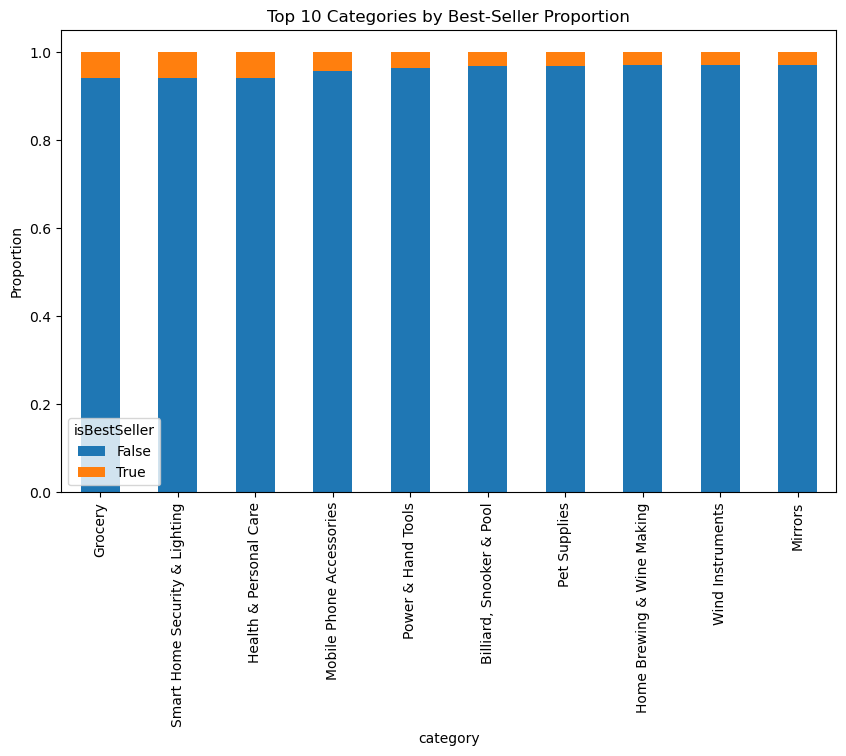

In [19]:
top10.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)
plt.ylabel("Proportion")
plt.title("Top 10 Categories by Best-Seller Proportion")
plt.show()

In [21]:
price = df['price']

In [23]:
def tukeys_test_outliers(price):
    Q1 = price.quantile(0.25)
    Q3 = price.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = price[(price < lower_bound) | (price > upper_bound)]
    
    return outliers

In [26]:
outliers = tukeys_test_outliers(df['price'])
outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [25]:
df_no_outliers = df[~df['price'].isin(outliers)]

In [27]:
df.shape[0]

2443651

In [28]:
df_no_outliers.shape[0]

2115963

In [32]:
top_20_categories = (
    df_no_outliers['category']
    .value_counts()
    .head(20)
    .index
)


In [ ]:
df_top20 = df_no_outliers[
    df_no_outliers['category'].isin(top_20_categories)
]

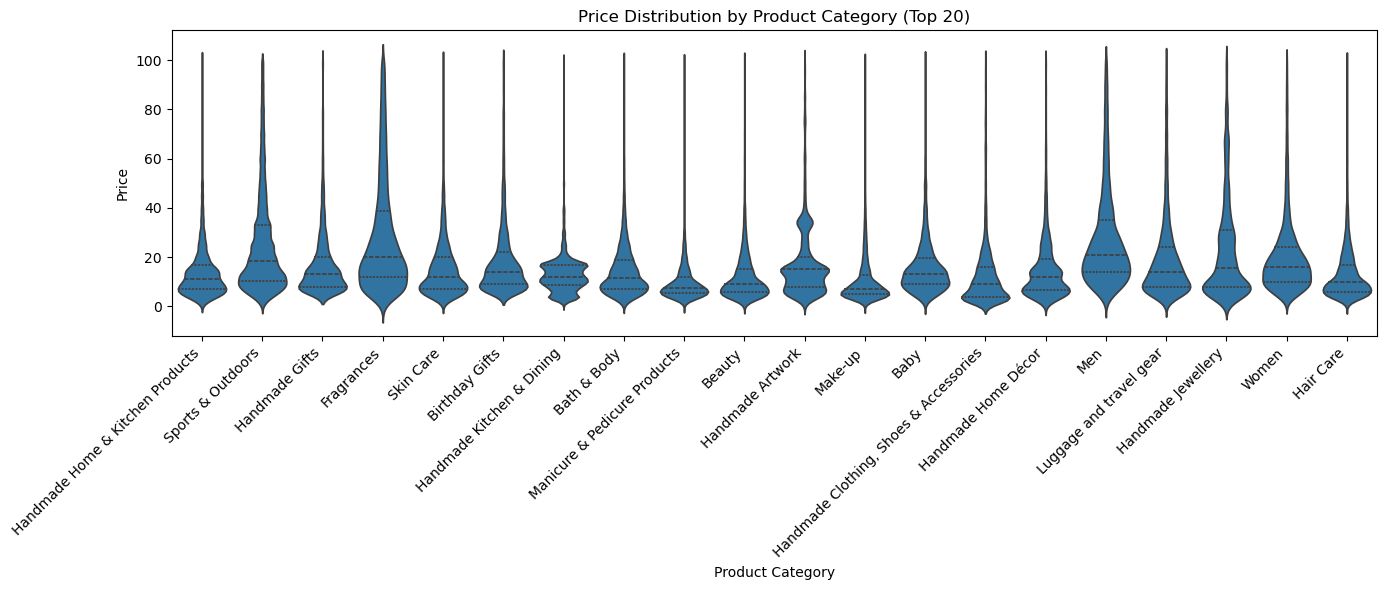

In [36]:
plt.figure(figsize=(14, 6))

sns.violinplot(
    data=df_top20,
    x='category',
    y='price',
    inner='quartile',   
    density_norm='width'
)

plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Product Category (Top 20)')
plt.xlabel('Product Category')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [37]:
median_price_by_category = (
    df
    .groupby('category')['price']
    .median()
    .sort_values(ascending=False)
)

In [38]:
median_price_by_category.head(10)

category
Laptops                                1042.725
Desktop PCs                             810.400
Snowboards                              366.725
Home Audio Record Players               326.080
3D Printers                             319.000
Motorbike Exhaust & Exhaust Systems     313.830
Graphics Cards                          259.980
Snowboard Boots                         258.990
Lenses                                  249.990
Barebone PCs                            244.990
Name: price, dtype: float64

In [63]:
top10_mean_price = (
    df_no_outliers
    .groupby('category')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

/var/folders/tj/ks1sq5t50v5465wqpwwb64b00000gn/T/ipykernel_8446/1575472495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


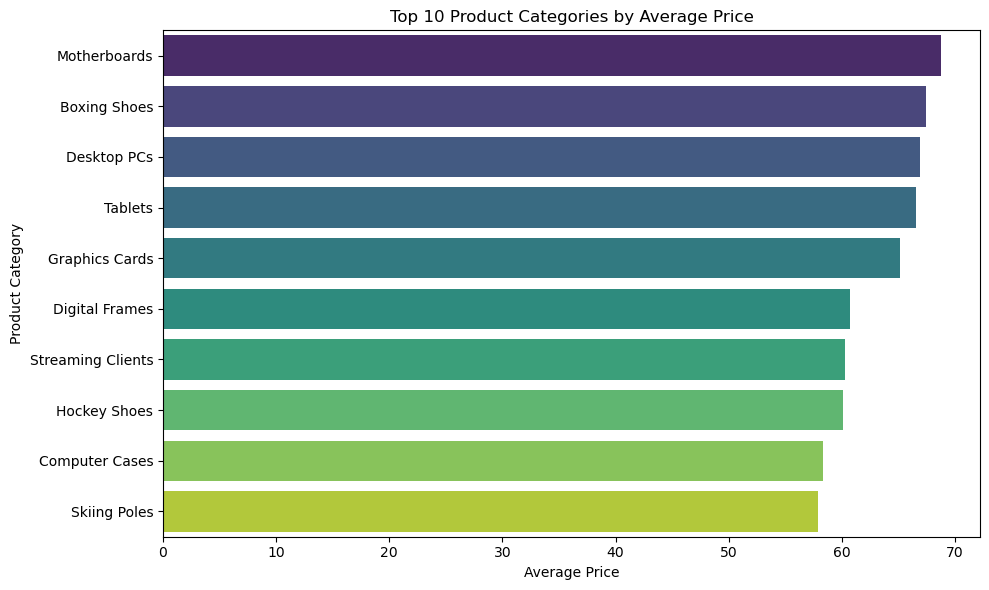

In [64]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top10_mean_price,
    x='price',
    y='category',
    palette='viridis'
)

plt.title('Top 10 Product Categories by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()

In [61]:
median_stars_by_category = (
    df_no_outliers
    .groupby('category')['stars']
    .median()
    .sort_values(ascending=False)
)

median_stars_by_category.head(10)


category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Cables & Accessories            4.5
CPUs                            4.5
Name: stars, dtype: float64

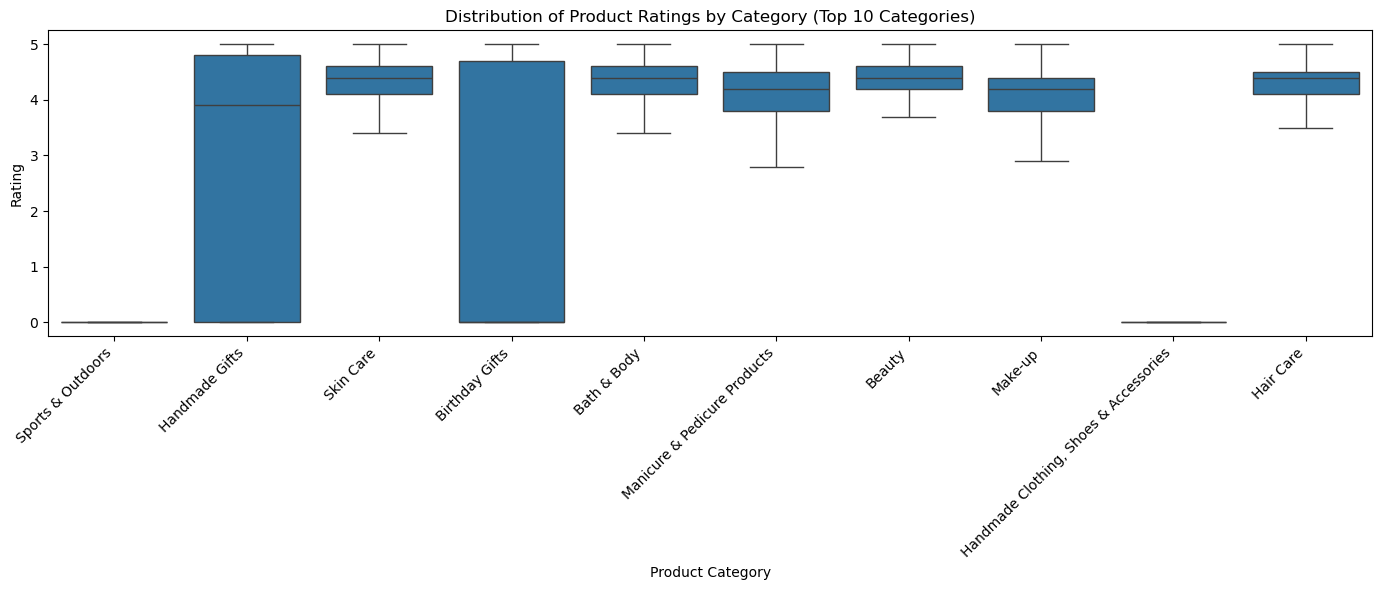

In [62]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df_top10,
    x='category',
    y='stars',
    showfliers=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings by Category (Top 10 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

In [71]:
df['price'].corr(df['stars'])                 # Pearson
df['price'].corr(df['stars'], method='spearman')

np.float64(-0.13316425462433998)

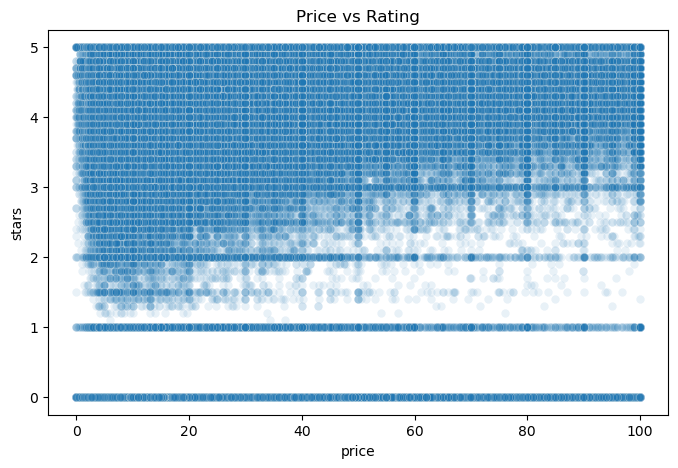

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_no_outliers,
    x='price',
    y='stars',
    alpha=0.1   # 关键
)
plt.title('Price vs Rating')
plt.show()

In [81]:
numerical_df = df_no_outliers.select_dtypes(include='number')

In [82]:
corr_matrix = numerical_df.corr()

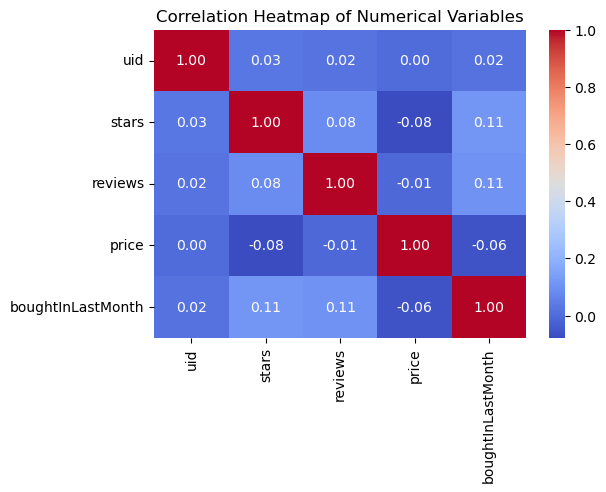

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

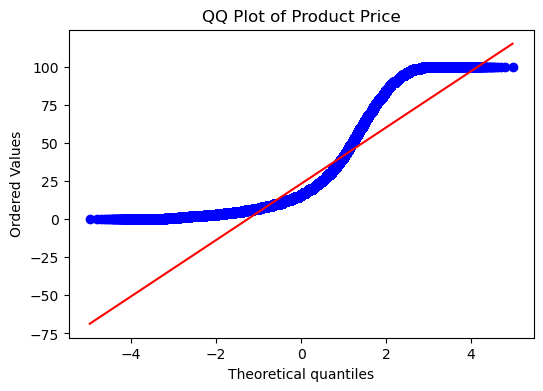

In [80]:
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Price')
plt.show()